In [30]:
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

In [31]:
crisis1 = pd.read_excel('../data/Crisisv.1.xlsx')
crisis2 = pd.read_excel('../data/NSSCrisisv.2.xlsx')

## 2020 DataFrames

In [32]:
stats_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=10, nrows=9, usecols='A:B')
stats_2020.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
#stats_2020['Total'].sub(' calls', '') this didn't work the way I wanted it to, commenting it out until I figure out how to fix it
stats_2020

,Category,Total
0,Number of Received Calls,45772 calls
1,Number of Answered Calls,28483 calls
2,Number of Abandoned Unanswered Call,9484 calls
3,Number of Other Unanswered Calls,6829 calls
4,Number of Transferred Calls,976 calls
5,Unanswered Rate,0.1492
6,Abandon Rate,0.2072
7,Agent Login,33332
8,Agent Logoff,33313


In [33]:
queue_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=23, nrows=12, usecols='A:I')
queue_dist_2020

,Queue,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait
0,AWARE,11,8,3,0,0.7273,0.2727,00:02:04,00:01:44
1,Crisis Eng,22704,15281,7264,159,0.6681,0.3143,00:10:54,00:01:34
2,Crisis Eng PRIORITY,3200,2070,1056,74,0.6700,0.3300,00:10:32,00:01:59
3,Crisis Spanish,153,107,39,7,0.7355,0.2516,00:08:30,00:02:11
4,Crisis Spanish PRIORITY,16,13,2,1,0.8750,0.1250,00:07:50,00:01:58
5,Lifeline,6132,3542,2493,97,0.5934,0.4066,00:11:34,00:00:33
6,MHART,120,75,45,0,0.5474,0.3285,00:07:18,00:00:23
7,Pet Loss,0,0,0,0,0.0000,0.0000,00:00:00,00:00:00
8,REDLINE,11708,6422,4752,534,0.5941,0.4059,00:05:42,00:00:29
9,Referral Line,1358,888,366,104,0.7305,0.2695,00:03:32,00:00:24


In [34]:
month_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=39, nrows=12, usecols='A:K')
month_dist_2020

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,2020-01,2880,1795,1033,52,0.6413,0.3587,00:08:58,00:01:15,3160,3160
1,2020-02 (2020-02),2704,1698,936,70,0.6538,0.3462,00:10:08,00:01:03,3462,3450
2,2020-03 (2020-03),4059,2537,1347,175,0.6681,0.3319,00:08:05,00:00:54,3223,3217
3,2020-04 (2020-04),3385,2152,1147,86,0.6612,0.3388,00:09:23,00:01:04,2758,2750
4,2020-05 (2020-05),3721,2239,1388,94,0.6270,0.3730,00:10:32,00:01:18,2369,2377
5,2020-06 (2020-06),3693,2221,1413,59,0.6174,0.3826,00:10:18,00:01:10,2415,2415
6,2020-07 (2020-07),3919,2543,1296,80,0.6693,0.3307,00:10:04,00:00:58,2678,2671
7,2020-08 (2020-08),4390,2527,1803,60,0.5893,0.4107,00:10:15,00:01:23,2465,2479
8,2020-09 (2020-09),3967,2442,1464,61,0.6310,0.3690,00:10:19,00:01:16,3087,3070
9,2020-10 (2020-10),4143,2617,1480,46,0.6428,0.3572,00:09:30,00:01:19,2887,2889


In [35]:
day_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=55, nrows=7, usecols='A:K')
day_dist_2020

,Day,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,6864,3576,3174,114,0.5376,0.4624,00:10:17,00:01:28,3641,3624
1,Monday,6811,4472,2187,152,0.6789,0.3211,00:08:38,00:00:59,5549,5576
2,Tuesday,6289,4138,2046,105,0.6747,0.3253,00:09:34,00:01:06,5544,5620
3,Wednesday,6608,4463,1981,164,0.7002,0.2998,00:09:13,00:00:58,5538,5696
4,Thursday,6370,4212,2003,155,0.6856,0.3144,00:09:34,00:00:59,4696,4779
5,Friday,6119,3939,2032,148,0.6679,0.3321,00:09:15,00:01:06,4646,4383
6,Saturday,6711,3683,2890,138,0.5694,0.4306,00:09:54,00:01:25,3718,3635


In [36]:
queue_answered_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=66, nrows=10, usecols='A:C')
queue_answered_2020

,Queue,Count,%
0,AWARE,8 calls,0.0003
1,Crisis Eng,15281 calls,0.5365
2,Crisis Eng PRIORITY,2070 calls,0.0727
3,Crisis Spanish,107 calls,0.0038
4,Crisis Spanish PRIORITY,13 calls,0.0005
5,Lifeline,3542 calls,0.1244
6,MHART,75 calls,0.0026
7,REDLINE,6422 calls,0.2255
8,Referral Line,888 calls,0.0312
9,SAMHSA,77 calls,0.0027


## Service Speed Charts

In [37]:
service_speed_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=80, nrows=10, usecols='A:D')
service_speed_2020.columns = ['Answer', 'Count_2020', 'Delta_2020', 'Percent_2020']
service_speed_2020

,Answer,Count_2020,Delta_2020,Percent_2020
0,Within 15 secs,21405 calls,21405,0.7266
1,Within 30 secs,25052 calls,3647,0.8504
2,Within 45 secs,26068 calls,1016,0.8849
3,Within 60 secs,26734 calls,666,0.9075
4,Within 75 secs,27090 calls,356,0.9196
5,Within 90 secs,27310 calls,220,0.9271
6,Within 105 secs,27492 calls,182,0.9332
7,Within 120 secs,27677 calls,185,0.9395
8,Within 135 secs,27722 calls,45,0.9410
9,Within 150+ secs,29459 calls,1737,1.0000


In [9]:
# Declare a list that is to be converted into a column
#year = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020',]
# Using 'Address' as the column name
# and equating it to the list
#service_speed_2020['Year'] = year
#service_speed_2020

In [38]:
service_speed_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=93, nrows=10, usecols='A:D')
service_speed_2021.columns = ['Answer', 'Count_2021', 'Delta_2021', 'Percent_2021']
service_speed_2021

,Answer,Count_2021,Delta_2021,Percent_2021
0,Within 15 secs,27645 calls,27645,0.7291
1,Within 30 secs,32077 calls,4432,0.8459
2,Within 45 secs,33423 calls,1346,0.8814
3,Within 60 secs,34160 calls,737,0.9009
4,Within 75 secs,34615 calls,455,0.9129
5,Within 90 secs,34985 calls,370,0.9226
6,Within 105 secs,35301 calls,316,0.9310
7,Within 120 secs,35550 calls,249,0.9375
8,Within 135 secs,35676 calls,126,0.9408
9,Within 150+ secs,37919 calls,2243,1.0000


In [11]:
#year = ['2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021',]
#service_speed_2021['Year'] = year
#service_speed_2021

In [39]:
service_speed_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=80, nrows=10, usecols='A:D')
service_speed_2022.columns = ['Answer', 'Count_2022', 'Delta_2022', 'Percent_2022']
service_speed_2022

,Answer,Count_2022,Delta_2022,Percent_2022
0,Within 15 secs,10235 calls,10235,0.7627
1,Within 30 secs,11684 calls,1449,0.8707
2,Within 45 secs,12079 calls,395,0.9001
3,Within 60 secs,12290 calls,211,0.9159
4,Within 75 secs,12456 calls,166,0.9282
5,Within 90 secs,12572 calls,116,0.9369
6,Within 105 secs,12667 calls,95,0.9440
7,Within 120 secs,12749 calls,82,0.9501
8,Within 135 secs,12781 calls,32,0.9525
9,Within 150+ secs,13419 calls,638,1.0000


In [13]:
#year = ['2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022',]
#service_speed_2022['Year'] = year
#service_speed_2022

### Merge

In [40]:
service_speed_2020_2021 = pd.merge(service_speed_2020, service_speed_2021, on='Answer', how='inner')
service_speed_2020_2021

,Answer,Count_2020,Delta_2020,Percent_2020,Count_2021,Delta_2021,Percent_2021
0,Within 15 secs,21405 calls,21405,0.7266,27645 calls,27645,0.7291
1,Within 30 secs,25052 calls,3647,0.8504,32077 calls,4432,0.8459
2,Within 45 secs,26068 calls,1016,0.8849,33423 calls,1346,0.8814
3,Within 60 secs,26734 calls,666,0.9075,34160 calls,737,0.9009
4,Within 75 secs,27090 calls,356,0.9196,34615 calls,455,0.9129
5,Within 90 secs,27310 calls,220,0.9271,34985 calls,370,0.9226
6,Within 105 secs,27492 calls,182,0.9332,35301 calls,316,0.9310
7,Within 120 secs,27677 calls,185,0.9395,35550 calls,249,0.9375
8,Within 135 secs,27722 calls,45,0.9410,35676 calls,126,0.9408
9,Within 150+ secs,29459 calls,1737,1.0000,37919 calls,2243,1.0000


In [75]:
service_speed_2022 = ['0.7627', '0.8707', '0.9001', '0.9159', '0.9282', '0.9369', '0.9440', '0.9501', '0.9525', '1.0000']
service_speed_2020_2021['Percent_2022'] = speed_percent_2022

#service_speed_2020_2022 = pd.merge(service_speed_2020_2021, service_speed_2022, on='Answer', how='inner')
#service_speed_2020_2022

service_speed_2020_2021

,Answer,Count_2020,Delta_2020,Percent_2020,Count_2021,Delta_2021,Percent_2021,Percent_2022
0,Within 15 secs,21405 calls,21405,0.7266,27645 calls,27645,0.7291,0.7627
1,Within 30 secs,25052 calls,3647,0.8504,32077 calls,4432,0.8459,0.8707
2,Within 45 secs,26068 calls,1016,0.8849,33423 calls,1346,0.8814,0.9001
3,Within 60 secs,26734 calls,666,0.9075,34160 calls,737,0.9009,0.9159
4,Within 75 secs,27090 calls,356,0.9196,34615 calls,455,0.9129,0.9282
5,Within 90 secs,27310 calls,220,0.9271,34985 calls,370,0.9226,0.9369
6,Within 105 secs,27492 calls,182,0.9332,35301 calls,316,0.9310,0.9440
7,Within 120 secs,27677 calls,185,0.9395,35550 calls,249,0.9375,0.9501
8,Within 135 secs,27722 calls,45,0.9410,35676 calls,126,0.9408,0.9525
9,Within 150+ secs,29459 calls,1737,1.0000,37919 calls,2243,1.0000,1.0000


In [78]:
service_speed_2020_2022=service_speed_2020_2021
service_speed_2020_2022.columns = ['Answer', 'Count_2020', 'Delta_2020', 'Percent_2020', 'Count_2021', 'Delta_2021', 'Percent_2021', 'Percent_2022']
service_speed_2020_2022

,Answer,Count_2020,Delta_2020,Percent_2020,Count_2021,Delta_2021,Percent_2021,Percent_2022
0,Within 15 secs,21405 calls,21405,0.7266,27645 calls,27645,0.7291,0.7627
1,Within 30 secs,25052 calls,3647,0.8504,32077 calls,4432,0.8459,0.8707
2,Within 45 secs,26068 calls,1016,0.8849,33423 calls,1346,0.8814,0.9001
3,Within 60 secs,26734 calls,666,0.9075,34160 calls,737,0.9009,0.9159
4,Within 75 secs,27090 calls,356,0.9196,34615 calls,455,0.9129,0.9282
5,Within 90 secs,27310 calls,220,0.9271,34985 calls,370,0.9226,0.9369
6,Within 105 secs,27492 calls,182,0.9332,35301 calls,316,0.9310,0.9440
7,Within 120 secs,27677 calls,185,0.9395,35550 calls,249,0.9375,0.9501
8,Within 135 secs,27722 calls,45,0.9410,35676 calls,126,0.9408,0.9525
9,Within 150+ secs,29459 calls,1737,1.0000,37919 calls,2243,1.0000,1.0000


In [79]:
service_speed_2020_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Answer        10 non-null     object 
 1   Count_2020    10 non-null     object 
 2   Delta_2020    10 non-null     int64  
 3   Percent_2020  10 non-null     float64
 4   Count_2021    10 non-null     object 
 5   Delta_2021    10 non-null     int64  
 6   Percent_2021  10 non-null     float64
 7   Percent_2022  10 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 720.0+ bytes


In [80]:
service_speed_2020_2022['Percent_2022'] = service_speed_2020_2022['Percent_2022'].astype(float, errors = 'raise')
service_speed_2020_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Answer        10 non-null     object 
 1   Count_2020    10 non-null     object 
 2   Delta_2020    10 non-null     int64  
 3   Percent_2020  10 non-null     float64
 4   Count_2021    10 non-null     object 
 5   Delta_2021    10 non-null     int64  
 6   Percent_2021  10 non-null     float64
 7   Percent_2022  10 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 720.0+ bytes


In [19]:
#service_speed_2020_2022 = pd.merge(service_speed_2020_2021, service_speed_2021, on='Answer', how='inner')
#service_speed_2020_2022

In [20]:
#service_speed_2020_2022.columns = ['Answer', 'Count_2020', 'Delta_2020', 'Percent_2020', 'Count_2021', 'Delta_2021', 'Percent_2021', 'Count_2022', 'Delta_2022', 'Percent_2022',]
#service_speed_2020_2022

In [21]:
#plt.figure(figsize=(12, 6))
#plt.bar(top_7_sw.DSP, top_7_sw.Songwriter, color=['g', 'm', 'y', 'b', '1', 'orange', 'r'], edgecolor='black')
#plt.ylabel('% of Songwriter Info Provided', fontsize=16)
#plt.xticks(rotation = 50, fontsize=16)
#plt.yticks([20, 40, 60, 80, 100], fontsize=16)
#plt.text('YouTube', 10, '0', fontsize=16)
#plt.text('SoundCloud', 10, '0', fontsize=16)
#plt.text('Tidal', 10, '0.4', fontsize=16)
#plt.title('Top 7 DSPs by % of Songwriter Info Provided', fontsize=20);

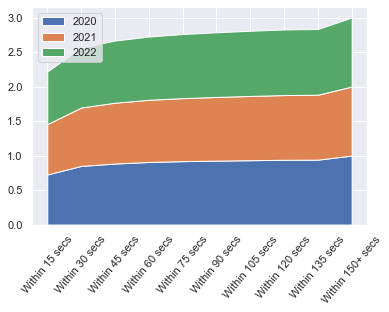

In [45]:
x=service_speed_2020_2022.Answer
y=[service_speed_2020_2022.Percent_2020, service_speed_2020_2022.Percent_2021, service_speed_2020_2022.Percent_2022]

plt.stackplot(x,y, labels=['2020', '2021', '2022'])
plt.legend(loc='upper left')
plt.xticks(rotation = 50)
plt.show()

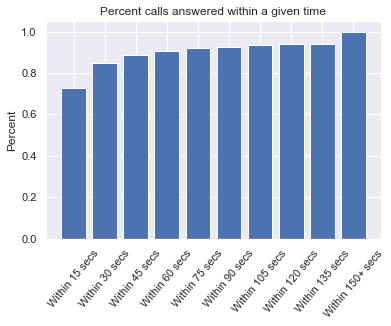

In [63]:
plt.bar(service_speed_2020_2022.Answer, service_speed_2020_2022.Percent_2020)
plt.ylabel('Percent') # Number of Streams times 10^9
plt.xticks(rotation = 50)
plt.title('Percent calls answered within a given time');

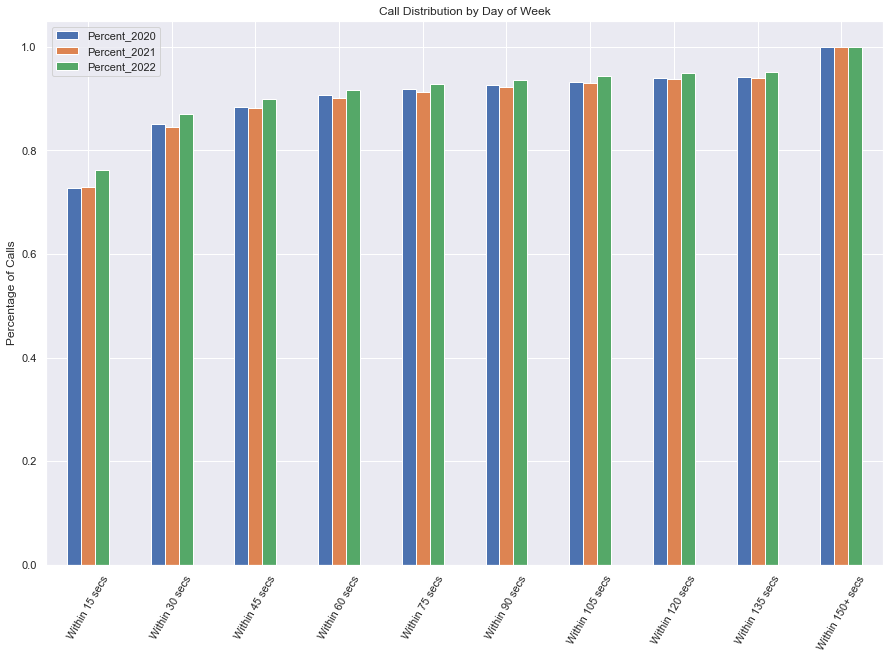

In [62]:
#plt.figure(figsize=()
service_speed_2020_2022.plot(x='Answer', y=['Percent_2020', 'Percent_2021', 'Percent_2022'], kind='bar')
plt.title('Call Distribution by Day of Week')
plt.ylabel('Percentage of Calls')
plt.xlabel('')
plt.xticks(rotation=60)
plt.gcf().set_size_inches(15, 10)  
plt.show();


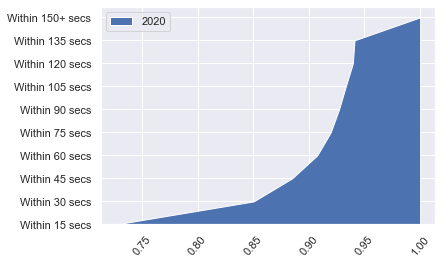

In [49]:
x=service_speed_2020.Percent_2020
y=service_speed_2020.Answer

plt.stackplot(x,y, labels=['2020'])
plt.legend(loc='upper left')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
x=service_speed_2021.Percent_2021
y=service_speed_2021.Answer

plt.stackplot(x,y, labels=['2020'])
plt.legend(loc='upper left')
plt.xticks(rotation = 50)
plt.show()

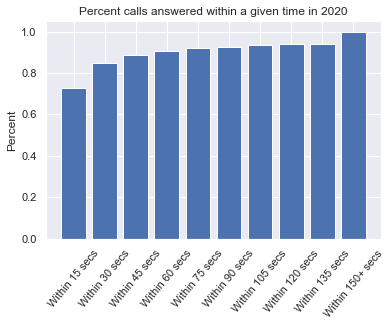

In [87]:
#ugly bar chart to get my bearings
plt.bar(service_speed_2020.Answer, service_speed_2020.Percent_2020)
plt.ylabel('Percent') # Number of Streams times 10^9
plt.xticks(rotation = 50)
plt.title('Percent calls answered within a given time in 2020');

## Abandon Rate Charts

In [64]:
abandon_rate_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=94, nrows=10, usecols='A:D')
abandon_rate_2020

,Unanswer,Count,Delta,%
0,Within 15 secs,432 calls,432,0.0265
1,Within 30 secs,2012 calls,1580,0.1233
2,Within 45 secs,3656 calls,1644,0.2241
3,Within 60 secs,8659 calls,5003,0.5308
4,Within 75 secs,11113 calls,2454,0.6812
5,Within 90 secs,11637 calls,524,0.7134
6,Within 105 secs,12062 calls,425,0.7394
7,Within 120 secs,12403 calls,341,0.7603
8,Within 135 secs,12981 calls,578,0.7957
9,Within 150+ secs,16313 calls,3332,1.0000


In [67]:
abandon_rate_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=107, nrows=10, usecols='A:D')
abandon_rate_2021

,Unanswer,Count,Delta,%
0,Within 15 secs,239 calls,239,0.0149
1,Within 30 secs,1708 calls,1469,0.1064
2,Within 45 secs,3549 calls,1841,0.2210
3,Within 60 secs,7591 calls,4042,0.4728
4,Within 75 secs,9167 calls,1576,0.5709
5,Within 90 secs,9823 calls,656,0.6118
6,Within 105 secs,10303 calls,480,0.6417
7,Within 120 secs,10741 calls,438,0.6690
8,Within 135 secs,11422 calls,681,0.7114
9,Within 150+ secs,16056 calls,4634,1.0000


In [68]:
abandon_rate_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=94, nrows=10, usecols='A:D')
abandon_rate_2022

,Unanswer,Count,Delta,%
0,Within 15 secs,15 calls,15,0.0039
1,Within 30 secs,402 calls,387,0.1045
2,Within 45 secs,859 calls,457,0.2233
3,Within 60 secs,1929 calls,1070,0.5016
4,Within 75 secs,2154 calls,225,0.5601
5,Within 90 secs,2340 calls,186,0.6084
6,Within 105 secs,2487 calls,147,0.6466
7,Within 120 secs,2596 calls,109,0.6750
8,Within 135 secs,2767 calls,171,0.7194
9,Within 150+ secs,3846 calls,1079,1.0000


In [69]:
abandon_rate_2020_2021 = pd.merge(abandon_rate_2020, abandon_rate_2021, on='Unanswer', how='inner')
abandon_rate_2020_2021

,Unanswer,Count_x,Delta_x,%_x,Count_y,Delta_y,%_y
0,Within 15 secs,432 calls,432,0.0265,239 calls,239,0.0149
1,Within 30 secs,2012 calls,1580,0.1233,1708 calls,1469,0.1064
2,Within 45 secs,3656 calls,1644,0.2241,3549 calls,1841,0.2210
3,Within 60 secs,8659 calls,5003,0.5308,7591 calls,4042,0.4728
4,Within 75 secs,11113 calls,2454,0.6812,9167 calls,1576,0.5709
5,Within 90 secs,11637 calls,524,0.7134,9823 calls,656,0.6118
6,Within 105 secs,12062 calls,425,0.7394,10303 calls,480,0.6417
7,Within 120 secs,12403 calls,341,0.7603,10741 calls,438,0.6690
8,Within 135 secs,12981 calls,578,0.7957,11422 calls,681,0.7114
9,Within 150+ secs,16313 calls,3332,1.0000,16056 calls,4634,1.0000


In [70]:
abandon_rate_2020_2022 = pd.merge(abandon_rate_2020_2021, abandon_rate_2022, on='Unanswer', how='inner')
abandon_rate_2020_2022

,Unanswer,Count_x,Delta_x,%_x,Count_y,Delta_y,%_y,Count,Delta,%
0,Within 15 secs,432 calls,432,0.0265,239 calls,239,0.0149,15 calls,15,0.0039
1,Within 30 secs,2012 calls,1580,0.1233,1708 calls,1469,0.1064,402 calls,387,0.1045
2,Within 45 secs,3656 calls,1644,0.2241,3549 calls,1841,0.2210,859 calls,457,0.2233
3,Within 60 secs,8659 calls,5003,0.5308,7591 calls,4042,0.4728,1929 calls,1070,0.5016
4,Within 75 secs,11113 calls,2454,0.6812,9167 calls,1576,0.5709,2154 calls,225,0.5601
5,Within 90 secs,11637 calls,524,0.7134,9823 calls,656,0.6118,2340 calls,186,0.6084
6,Within 105 secs,12062 calls,425,0.7394,10303 calls,480,0.6417,2487 calls,147,0.6466
7,Within 120 secs,12403 calls,341,0.7603,10741 calls,438,0.6690,2596 calls,109,0.6750
8,Within 135 secs,12981 calls,578,0.7957,11422 calls,681,0.7114,2767 calls,171,0.7194
9,Within 150+ secs,16313 calls,3332,1.0000,16056 calls,4634,1.0000,3846 calls,1079,1.0000


In [71]:
abandon_rate_2020_2022.columns = ['Unanswer', 'Count_2020', 'Delta_2020', 'Percent_2020', 'Count_2021', 'Delta_2021', 'Percent_2021', 'Count_2022', 'Delta_2022', 'Percent_2022']
abandon_rate_2020_2022

,Unanswer,Count_2020,Delta_2020,Percent_2020,Count_2021,Delta_2021,Percent_2021,Count_2022,Delta_2022,Percent_2022
0,Within 15 secs,432 calls,432,0.0265,239 calls,239,0.0149,15 calls,15,0.0039
1,Within 30 secs,2012 calls,1580,0.1233,1708 calls,1469,0.1064,402 calls,387,0.1045
2,Within 45 secs,3656 calls,1644,0.2241,3549 calls,1841,0.2210,859 calls,457,0.2233
3,Within 60 secs,8659 calls,5003,0.5308,7591 calls,4042,0.4728,1929 calls,1070,0.5016
4,Within 75 secs,11113 calls,2454,0.6812,9167 calls,1576,0.5709,2154 calls,225,0.5601
5,Within 90 secs,11637 calls,524,0.7134,9823 calls,656,0.6118,2340 calls,186,0.6084
6,Within 105 secs,12062 calls,425,0.7394,10303 calls,480,0.6417,2487 calls,147,0.6466
7,Within 120 secs,12403 calls,341,0.7603,10741 calls,438,0.6690,2596 calls,109,0.6750
8,Within 135 secs,12981 calls,578,0.7957,11422 calls,681,0.7114,2767 calls,171,0.7194
9,Within 150+ secs,16313 calls,3332,1.0000,16056 calls,4634,1.0000,3846 calls,1079,1.0000


In [ ]:
Year = ['2020', '2021', '2022']
Total_Answered_By_Year = ['29459', '37919', '13419']
Total_Unanswered_By_Year = ['16313', '16056', '3846']

Answered_v_Unanswered

Answered_v_Unanswered.plot(x='tbd', y=['tbd'], kind='bar')


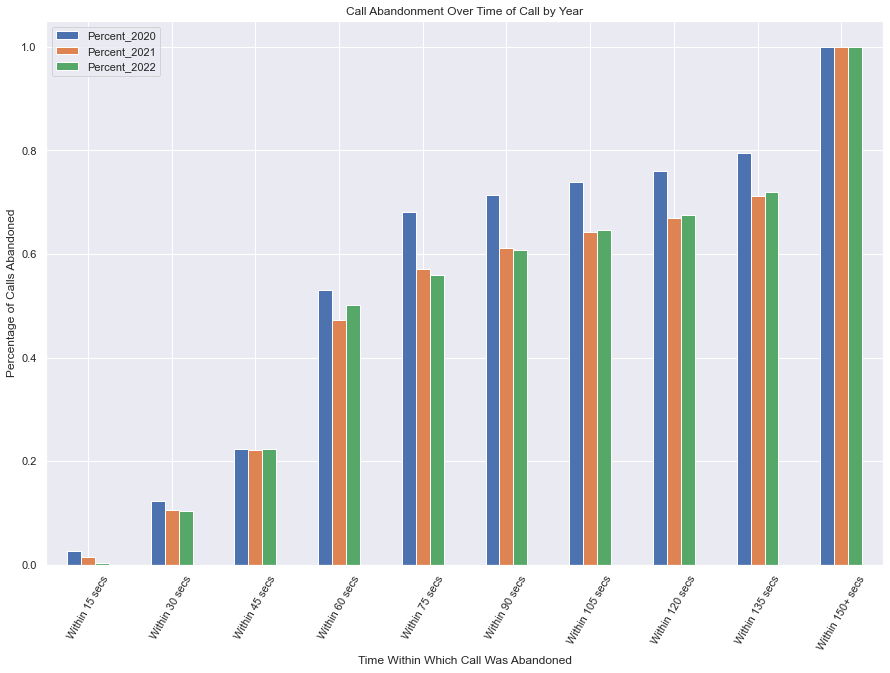

In [85]:
abandon_rate_2020_2022.plot(x='Unanswer', y=['Percent_2020', 'Percent_2021', 'Percent_2022'], kind='bar')
plt.title('Call Abandonment Over Time of Call by Year')
plt.ylabel('Percentage of Calls Abandoned')
plt.xlabel('Time Within Which Call Was Abandoned')
plt.xticks(rotation=60)
plt.gcf().set_size_inches(15, 10)  
plt.show();

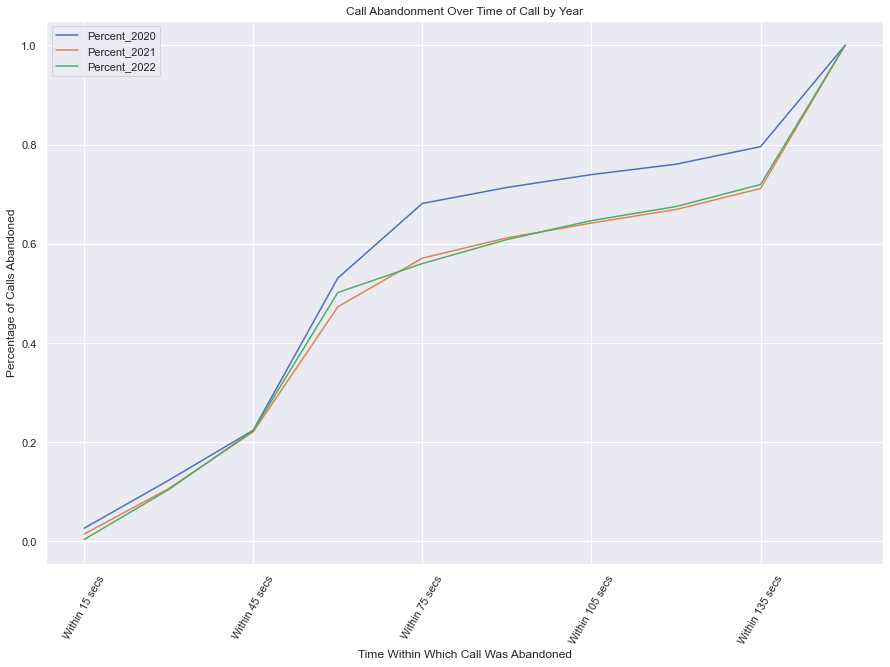

In [88]:
abandon_rate_2020_2022.plot(x='Unanswer', y=['Percent_2020', 'Percent_2021', 'Percent_2022'], kind='line')
plt.title('Call Abandonment Over Time of Call by Year')
plt.ylabel('Percentage of Calls Abandoned')
plt.xlabel('Time Within Which Call Was Abandoned')
plt.xticks(rotation=60)
plt.gcf().set_size_inches(15, 10)  
plt.show();

In [ ]:
abandon_rate_2020_2022.plot(x='Unanswer', y=['Percent_2020', 'Percent_2021', 'Percent_2022'], kind='bar')
plt.title('Call Abandonment Over Time of Call by Year')
plt.ylabel('Percentage of Calls Abandoned')
plt.xlabel('Time Within Which Call Was Abandoned')
plt.xticks(rotation=60)
plt.gcf().set_size_inches(15, 10)  
plt.show();

## 2021 DataFrames

In [ ]:
stats_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=10, nrows=9, usecols='A:B')
stats_2021.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
stats_2021

In [ ]:
queue_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=23, nrows=11, usecols='A:I')
queue_dist_2021

In [ ]:
month_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=38, nrows=12, usecols='A:K')
month_dist_2021

In [ ]:
hour_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=54, nrows=24, usecols='A:K')
hour_dist_2021

In [ ]:
day_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=82, nrows=7, usecols='A:K')
day_dist_2021

In [ ]:
service_speed_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=93, nrows=10, usecols='A:D')
service_speed_2021

In [ ]:
abandon_rate_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=107, nrows=10, usecols='A:D')
abandon_rate_2021

## 2022 DataFrames

In [ ]:
stats_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=7, nrows=9, usecols='A:B')
stats_2022.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
stats_2022

In [ ]:
queue_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=18, nrows=10, usecols='A:I')
queue_dist_2022

In [ ]:
month_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=32, nrows=4, usecols='A:K')
month_dist_2022

In [ ]:
hour_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=40, nrows=24, usecols='A:K')
hour_dist_2022

In [ ]:
day_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=68, nrows=7, usecols='A:K')
day_dist_2022

In [ ]:
service_speed_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=80, nrows=10, usecols='A:D')
service_speed_2022

In [ ]:
abandon_rate_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=94, nrows=10, usecols='A:D')
abandon_rate_2022

## Cleaning the data

In [ ]:
crisis1.dropna(how='all', axis=1, inplace=True)
crisis2.dropna(how='all', axis=1, inplace=True)

## Preliminary exploration of the Crisis data

In [ ]:
crisis1.head()

In [ ]:
crisis2.head()

In [ ]:
crisis1.info()

In [ ]:
crisis2.info()

In [ ]:
crisis1_call_type_counts = crisis1['CRISIS Call Information - Call Type'].value_counts()
print(crisis1_call_type_counts)

In [ ]:
crisis1_caller_age = crisis1['CRISIS Demographics - Age'].value_counts()
print(crisis1_caller_age)

In [ ]:
crisis1_caller_race = crisis1['CRISIS Demographics - Ethnicity'].value_counts()
print(crisis1_caller_race)

In [ ]:
crisis2_caller_race = crisis2['CRISIS Demographics - Race/Ethnicity'].value_counts()
print(crisis2_caller_race)

In [ ]:
crisis2_call_type_counts = crisis2['CRISIS Call Information - Call Type'].value_counts()
print(crisis2_call_type_counts)

In [ ]:
crisis2_caller_age = crisis2['CRISIS Demographics - Age'].value_counts()
print(crisis2_caller_age)

In [ ]:
crisis1_avg_call_duration_by_age = crisis1.groupby('CRISIS Demographics - Age')['CallLength'].mean()
crisis1_avg_call_duration_by_age = crisis1_avg_call_duration_by_age.sort_values(ascending=False)
print(crisis1_avg_call_duration_by_age)

In [ ]:
crisis2_avg_call_duration_by_age = crisis2.groupby('CRISIS Demographics - Age')['CallLength'].mean()
crisis2_avg_call_duration_by_age = crisis2_avg_call_duration_by_age.sort_values(ascending=False)
print(crisis2_avg_call_duration_by_age)

In [ ]:
crisis1_emergency_dispatched = crisis1['Was emergency rescue dispatched'].value_counts()
print(crisis1_emergency_dispatched)

In [ ]:
crisis1_zip = crisis1['PostalCode'].value_counts()
crisis1_zip = crisis1_zip.sort_values(ascending=False)
print(crisis1_zip)

In [ ]:
crisis2_zip = crisis2['PostalCode'].value_counts()
crisis2_zip = crisis2_zip.sort_values(ascending=False)
print(crisis2_zip)

## Findings from preliminary Crisis data exploration

In both Crisis1 and Crisis2, the age groups with the most calls are virtually the same. 56-70 makes the most calls, followed by 41-55 and so on. 0-6 age range is only included in Crisis2.

In Crisis1 and Crisis2, Caucasian category makes the most calls, followed by African-American. There is a steep drop off among the number of calls made by other races/ethnicities. This is probably due to the general population demographics of Nashville. 

In Crisis1, despite not making the most calls, the 18-24 age group has the longest average call length. Though 56-70 age group make the most calls, they have nearly the shortest average call length.

In Crisis2, the 85+ category tied for the fewest calls made but had the longest avg call length. Follwed by the 18-24 group again, who made the middle of the pack number of calls.  

## Chosen area of focus:

Your objectives for this dataset are as follows:
1. Examine call volume and identify surge times, seasons, or events.

In [ ]:
crisis2_zip = crisis2['PostalCode'].value_counts()

Charts from Abi below

In [ ]:
#day_dist_2020.hist(column='Received', by='Day') -- wanted a histogram but I think I need to just do a bar plot
plt.figure(figsize=(15,10))
plt.bar(day_dist_2020['Day'], day_dist_2020['Received'])
plt.title('Received Calls by Day of Week - 2020')
plt.ylabel('Call Count')
plt.xticks(rotation=50)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(day_dist_2021['Day'], day_dist_2021['Received'], color='m')
plt.title('Received Calls by Day of Week - 2021')
plt.ylabel('Call Count')
plt.xticks(rotation=50)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(day_dist_2022['Day'], day_dist_2022['Received'], color='g')
plt.title('Received Calls by Day of Week - 2022')
plt.ylabel('Call Count')
plt.xticks(rotation=50)
plt.show()

In [ ]:
#Abi's attempt 2
y1 = day_dist_2020['Received']
y2 = day_dist_2021['Received']
y3 = day_dist_2022['Received']
width = 0.2
plt.bar(day_dist_2020['Day'], y1, width, color='c')
plt.bar(day_dist_2021['Day'], y2, width, color='m')
plt.bar(day_dist_2022['Day'], y3, width, color='y')
#this sort of worked, but also definitely didn't work. keeping for reference again. Maybe I need to mer

In [ ]:
day_dist1 = pd.merge(day_dist_2020, day_dist_2021, on='Day', how='inner')
day_dist1

In [ ]:
day_dist = pd.merge(day_dist1, day_dist_2022, on='Day', how='inner')
day_dist
#alright, need to change the column names

In [ ]:
#this... mostly worked, but the columns came out in the wrong order... 
day_dist.rename(columns= {'Received_x':'2020 Received', 'Answered_x':'2020 Answered', 'Unanswered_x':'2020 Unanswered', 'Transfers_x':'2020 Transferred', '% Answ_x':'2020 % Answered', '% Unansw_x':'2020 % Unanswered', 'Avg Durat._x':'2020 Avg Duration', 'Avg Wait_x':'2020 Avg Wait', 'Logins_x':'2020 Logins', 'Logoff_x':'2020 Logoffs', 'Received_x':'2021 Received', 'Answered_x':'2021 Answered', 'Unanswered_x':'2021 Unanswered', 'Transfers_x':'2021 Transferred', '% Answ_x':'2021 % Answered', '% Unansw_x':'2021 % Unanswered', 'Avg Durat._x':'2021 Avg Duration', 'Avg Wait_x':'2021 Avg Wait', 'Logins_x':'2021 Logins', 'Logoff_x':'2021 Logoffs', 'Received_x':'2022 Received', 'Answered_x':'2022 Answered', 'Unanswered_x':'2022 Unanswered', 'Transfers_x':'2022 Transferred', '% Answ_x':'2022 % Answered', '% Unansw_x':'2022 % Unanswered', 'Avg Durat._x':'2022 Avg Duration', 'Avg Wait_x':'2022 Avg Wait', 'Logins_x':'2022 Logins', 'Logoff_x':'2022 Logoffs'}, inplace=True)
day_dist